## Comparison of the best augmentations on 50 epochs, whole dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import trapz
from IPython.display import display

#### Import csv files and make the dfs

In [4]:
# df Luci
df_color_abd=pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_aug_color_a_b_d_100_percent.csv')
df_color_ade = pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_aug_color_a_d_e_100_percent.csv')
df_color_cde = pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_aug_color_c_d_e_100_percent.csv')
df_color_de = pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_aug_color_d_e_100_percent.csv')
df_color_oneof4 = pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_aug_color_oneof_4_comb_100_percent.csv')
df_color_weather_oneof3 = pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_aug_color_weather_oneof_3_comb_100_percent.csv')
df_color_weather_oneof4 = pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_aug_color_weather_oneof_4_comb_100_percent.csv')
df_color_weather_oneof5 = pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_aug_color_weather_oneof_5_comb_100_percent.csv')


In [5]:
# df Auro
df_2_random_color =  pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_augmented_color_2_random_tranforms_color_100_percent.csv')
df_2_random_color_or_all_best_weather = pd.read_csv('./Augmentations/100%/3b_GTA5_to_CITY_augmented_color_2_random_tranform_color_OR_ALL_g_h_i_100_percent.csv')

In [6]:
val_miou_2_random_color = df_2_random_color['val_mIoU']
val_miou_2_random_color_or_all_best_weather = df_2_random_color_or_all_best_weather['val_mIoU']
val_miou_color_abd = df_color_abd['val_mIoU']
val_miou_color_ade = df_color_ade['val_mIoU']
val_miou_color_cde = df_color_cde['val_mIoU']
val_miou_color_de = df_color_de['val_mIoU']
val_miou_color_oneof4 = df_color_oneof4['val_mIoU']
val_miou_color_weather_oneof3 = df_color_weather_oneof3['val_mIoU']
val_miou_color_weather_oneof4 = df_color_weather_oneof4['val_mIoU']
val_miou_color_weather_oneof5 = df_color_weather_oneof5['val_mIoU']

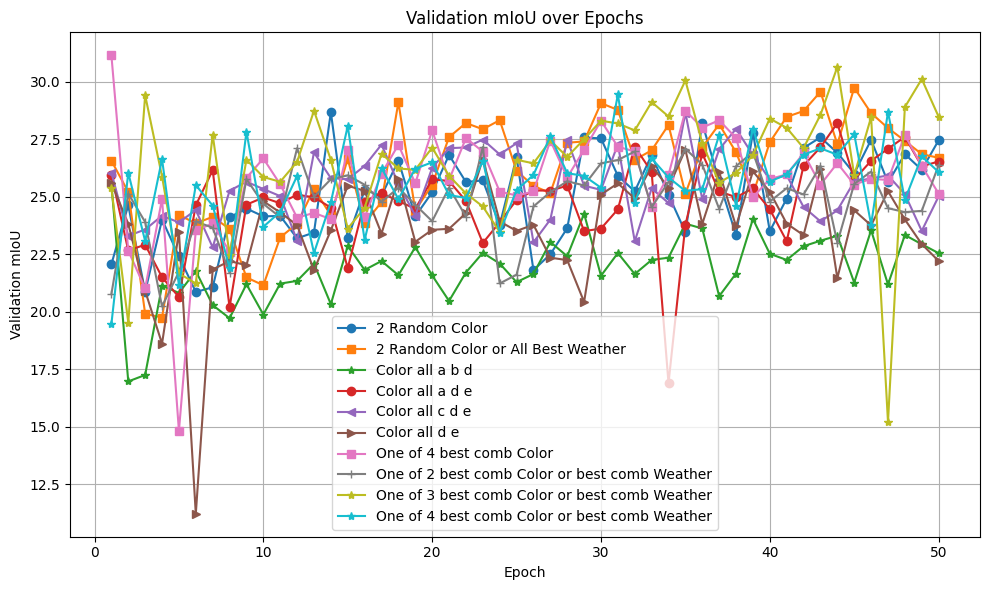

In [7]:
# Estrai e inverte le metriche per avere l'ordine epoche crescente
val_miou_2_random_color = df_2_random_color['val_mIoU'][::-1].reset_index(drop=True)
val_miou_2_random_color_or_all_best_weather = df_2_random_color_or_all_best_weather['val_mIoU'][::-1].reset_index(drop=True)
val_miou_color_abd = df_color_abd['val_mIoU'][::-1].reset_index(drop=True)
val_miou_color_ade = df_color_ade['val_mIoU'][::-1].reset_index(drop=True)
val_miou_color_cde = df_color_cde['val_mIoU'][::-1].reset_index(drop=True)
val_miou_color_de = df_color_de['val_mIoU'][::-1].reset_index(drop=True)
val_miou_color_oneof4 = df_color_oneof4['val_mIoU'][::-1].reset_index(drop=True)
val_miou_color_weather_oneof3 = df_color_weather_oneof3['val_mIoU'][::-1].reset_index(drop=True)
val_miou_color_weather_oneof4 = df_color_weather_oneof4['val_mIoU'][::-1].reset_index(drop=True)
val_miou_color_weather_oneof5 = df_color_weather_oneof5['val_mIoU'][::-1].reset_index(drop=True)


# Crea un asse delle epoche corretto (da 1 a 50)
epochs = range(1, len(val_miou_2_random_color) + 1)

# Plot
plt.figure(figsize=(10, 6))

plt.plot(epochs, val_miou_2_random_color, label='2 Random Color', marker='o')
plt.plot(epochs, val_miou_2_random_color_or_all_best_weather, label='2 Random Color or All Best Weather', marker='s')
plt.plot(epochs, val_miou_color_abd, label='Color all a b d', marker='*')
plt.plot(epochs, val_miou_color_ade, label='Color all a d e', marker='o')
plt.plot(epochs, val_miou_color_cde, label='Color all c d e', marker='<')
plt.plot(epochs, val_miou_color_de, label='Color all d e', marker='>')
plt.plot(epochs, val_miou_color_oneof4, label='One of 4 best comb Color', marker='s')
plt.plot(epochs, val_miou_color_weather_oneof3, label='One of 2 best comb Color or best comb Weather', marker='+')
plt.plot(epochs, val_miou_color_weather_oneof4, label='One of 3 best comb Color or best comb Weather', marker='*')
plt.plot(epochs, val_miou_color_weather_oneof5, label='One of 4 best comb Color or best comb Weather', marker='*')

plt.title('Validation mIoU over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation mIoU')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
threshold = 25  # soglia più sensata per val_mIoU

df_summary = pd.DataFrame({
    'Mean': [val_miou_2_random_color.mean(), 
             val_miou_2_random_color_or_all_best_weather.mean(),
             val_miou_color_abd.mean(),
             val_miou_color_ade.mean(),
             val_miou_color_cde.mean(),
             val_miou_color_de.mean(),
             val_miou_color_oneof4.mean(),
             val_miou_color_weather_oneof3.mean(),
             val_miou_color_weather_oneof4.mean(),
             val_miou_color_weather_oneof5.mean()
             ],
    'Max': [val_miou_2_random_color.max(), 
            val_miou_2_random_color_or_all_best_weather.max(),
            val_miou_color_abd.max(),
            val_miou_color_ade.max(),
            val_miou_color_cde.max(),
            val_miou_color_de.max(),
            val_miou_color_oneof4.max(),
            val_miou_color_weather_oneof3.max(),
            val_miou_color_weather_oneof4.max(),
            val_miou_color_weather_oneof5.max()
            ],
    'Min': [val_miou_2_random_color.min(), 
            val_miou_2_random_color_or_all_best_weather.min(),
            val_miou_color_abd.min(),
            val_miou_color_ade.min(),
            val_miou_color_cde.min(),
            val_miou_color_de.min(),
            val_miou_color_oneof4.min(),
            val_miou_color_weather_oneof3.min(),
            val_miou_color_weather_oneof4.min(),
            val_miou_color_weather_oneof5.min()
            ],
    'Std': [val_miou_2_random_color.std(), 
            val_miou_2_random_color_or_all_best_weather.std(),
            val_miou_color_abd.std(),
            val_miou_color_ade.std(),
            val_miou_color_cde.std(),
            val_miou_color_de.std(),
            val_miou_color_oneof4.std(),
            val_miou_color_weather_oneof3.std(),
            val_miou_color_weather_oneof4.std(),
            val_miou_color_weather_oneof5.std()

            ],
    'Best Epoch': [val_miou_2_random_color.idxmax() + 1, 
                   val_miou_2_random_color_or_all_best_weather.idxmax() + 1,
                   val_miou_color_abd.idxmax() + 1,
                   val_miou_color_ade.idxmax() + 1,
                   val_miou_color_cde.idxmax() + 1,
                   val_miou_color_de.idxmax() + 1,
                   val_miou_color_oneof4.idxmax() + 1,
                   val_miou_color_weather_oneof3.idxmax() + 1,
                   val_miou_color_weather_oneof4.idxmax() + 1,
                   val_miou_color_weather_oneof5.idxmax() + 1

                   ],
    'AUC': [trapz(val_miou_2_random_color), 
            trapz(val_miou_2_random_color_or_all_best_weather),
            trapz(val_miou_color_abd),
            trapz(val_miou_color_ade),
            trapz(val_miou_color_cde),
            trapz(val_miou_color_de),
            trapz(val_miou_color_oneof4),
            trapz(val_miou_color_weather_oneof3),
            trapz(val_miou_color_weather_oneof4),
            trapz(val_miou_color_weather_oneof5)
            ],
    f'Epochs > {threshold}': [(val_miou_2_random_color > threshold).sum(), 
                              (val_miou_2_random_color_or_all_best_weather > threshold).sum(),
                              (val_miou_color_abd > threshold).sum(),
                              (val_miou_color_ade > threshold).sum(),
                              (val_miou_color_cde > threshold).sum(),
                              (val_miou_color_de > threshold).sum(),
                              (val_miou_color_oneof4 > threshold).sum(),
                              (val_miou_color_weather_oneof3 > threshold).sum(),
                              (val_miou_color_weather_oneof4 > threshold).sum(),
                              (val_miou_color_weather_oneof5 > threshold).sum()
                              ],
    'Trend': [
        np.polyfit(range(len(val_miou_2_random_color)),val_miou_2_random_color, 1)[0],
        np.polyfit(range(len(val_miou_2_random_color_or_all_best_weather)), val_miou_2_random_color_or_all_best_weather, 1)[0],
        np.polyfit(range(len(val_miou_color_abd)), val_miou_color_abd, 1)[0],
        np.polyfit(range(len(val_miou_color_ade)), val_miou_color_ade, 1)[0],
        np.polyfit(range(len(val_miou_color_cde)), val_miou_color_cde, 1)[0],
        np.polyfit(range(len(val_miou_color_de)), val_miou_color_de, 1)[0],
        np.polyfit(range(len(val_miou_color_oneof4)), val_miou_color_oneof4, 1)[0],
        np.polyfit(range(len(val_miou_color_weather_oneof3)), val_miou_color_weather_oneof3, 1)[0],
        np.polyfit(range(len(val_miou_color_weather_oneof4)), val_miou_color_weather_oneof4, 1)[0],
        np.polyfit(range(len(val_miou_color_weather_oneof5)), val_miou_color_weather_oneof5, 1)[0]


    ],
    'Final Epoch mIoU': [val_miou_2_random_color.iloc[-1], 
                         val_miou_2_random_color_or_all_best_weather.iloc[-1],
                         val_miou_color_abd.iloc[-1],
                         val_miou_color_ade.iloc[-1],
                         val_miou_color_cde.iloc[-1],
                         val_miou_color_de.iloc[-1],
                         val_miou_color_oneof4.iloc[-1],
                         val_miou_color_weather_oneof3.iloc[-1],
                         val_miou_color_weather_oneof4.iloc[-1],
                         val_miou_color_weather_oneof5.iloc[-1]
                         ]
}, index=[
    '2 Random Color',
    '2 Random Color or All Best Weather',
    'Color all a b d',
    'Color all a d e',
    'Color all c d e',
    'Color all d e',
    'One of 4 best comb Color',
    'One of 2 best comb Color or best comb weather',
    'One of 3 best comb Color or best comb weather',
    'One of 4 best comb Color or best comb weather'
])

df_summary = df_summary.round(4)

def underline_best(s):
    return ['text-decoration: underline; font-weight: bold;' if v else '' for v in s]

styled_df = df_summary.style.set_caption("📊 Validation mIoU Summary Table") \
    .format(precision=4) \
    .set_table_styles([
        {'selector': 'caption', 'props': [('text-align', 'left'), ('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', 'white'), ('font-weight', 'bold'), ('color', 'black')]},
        {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
    ]) \
    .apply(lambda x: underline_best(x == x.max()), subset=['Mean', 'Max', 'Best Epoch', 'AUC', f'Epochs > {threshold}', 'Final Epoch mIoU', 'Trend']) \
    .apply(lambda x: underline_best(x == x.min()), subset=['Min', 'Std'])

display(styled_df)

,Mean,Max,Min,Std,Best Epoch,AUC,Epochs > 25,Trend,Final Epoch mIoU
2 Random Color,25.0120,28.6817,20.8643,2.0093,14,1225.8392,27,0.0799,27.4574
2 Random Color or All Best Weather,26.1068,29.7450,19.7537,2.4047,45,1278.7056,36,0.1145,26.6987
Color all a b d,21.9023,25.5633,16.9747,1.5263,1,1071.0602,1,0.0508,22.5510
Color all a d e,24.7197,28.2045,16.8969,2.0204,44,1209.7354,23,0.0598,26.5362
Color all c d e,25.4696,28.6590,22.8024,1.4461,35,1247.9429,33,0.0162,25.0221
Color all d e,23.6427,27.0582,11.2189,2.4744,35,1158.2218,15,0.0540,22.2114
One of 4 best comb Color,25.7297,31.1559,14.8233,2.3581,1,1258.3392,37,0.0606,25.1406
One of 2 best comb Color or best comb weather,24.8334,27.1656,20.2328,1.6791,23,1218.0935,27,0.0465,26.3833
One of 3 best comb Color or best comb weather,26.3891,30.6488,15.2096,2.7787,44,1292.5302,41,0.0663,28.4838
One of 4 best comb Color or best comb weather,25.5362,29.4572,19.4667,1.9056,31,1254.0395,33,0.0610,26.0791


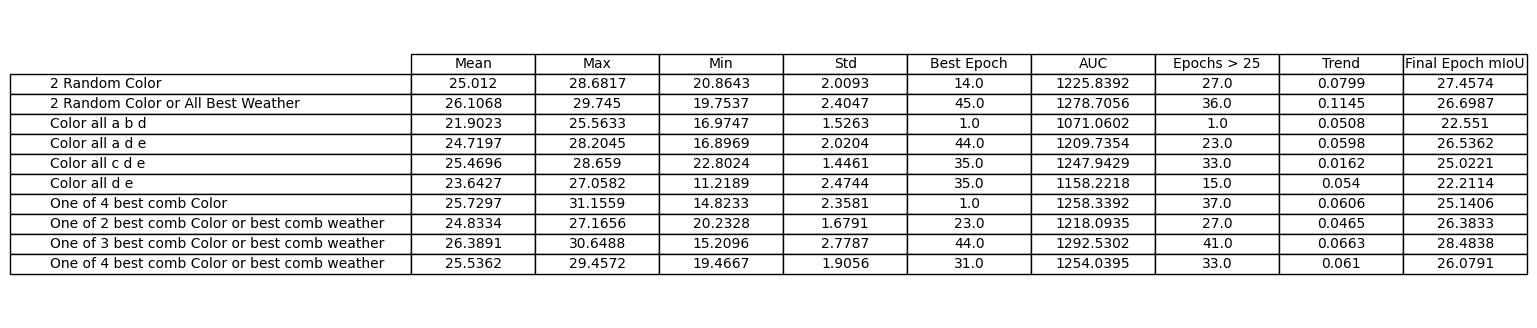

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))  # adjust size to fit your table
ax.axis('off')

table = ax.table(cellText=df_summary.values,
                 colLabels=df_summary.columns,
                 rowLabels=df_summary.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.savefig("validation_miou_summary.png", bbox_inches='tight', dpi=300)

#### Comments:
- The best one seems to be '2 Random Color or All Best Weather', since it has an overall higher mean, more epochs > 25, a higher AUC and a higher trend. 
- On the other hand, '2 Random Color' has a higher min valye, lower std and a higher Final Epoc mIoU, but overaal the other combiantion generally achieves better values and has a better trend.
- I SUGGEST WE CHOOSE '2 Random Color or All Best Weather' BETWEEN THESE 2.

## Metrics Explanation

| Column         | Description |
|----------------|-------------|
| **Mean**       | The average validation mIoU across all epochs. Gives a general sense of model performance over time. |
| **Max**        | The highest mIoU achieved during validation. Indicates peak performance. |
| **Min**        | The lowest mIoU recorded. Useful to assess consistency and worst-case performance. |
| **Std**        | The standard deviation of mIoU values. A lower value means the model is more stable across epochs. |
| **Best Epoch** | The epoch number (1-based) where the highest mIoU was achieved. |
| **AUC**        | The Area Under the Curve of the mIoU trend. A higher value reflects better performance over the full validation period. |
| **Epochs > 25** | Number of epochs where mIoU exceeded a threshold of 25. Useful to evaluate how consistently good the model is. |
| **Trend**      | The slope of a linear fit over all epochs. A positive value suggests performance is improving, while a negative one indicates degradation. |
